![](task1.png)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Input Data

In [3]:
x = df.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Target Data

In [5]:
target = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

Here  '0'  represent 'setosa'   ||   '1' represent 'versicolor'   ||   '2' represent 'virginica'

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualization 

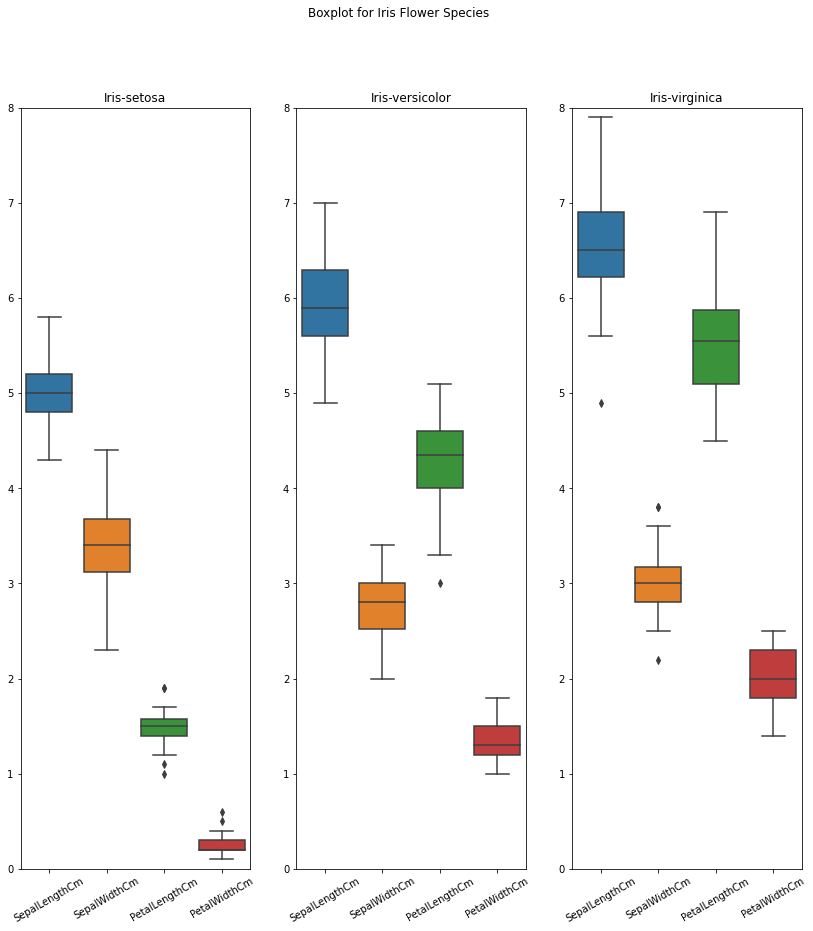

In [7]:
figure,ax = plt.subplots(1,3,figsize=(14,14))

plt.suptitle('Boxplot for Iris Flower Species')

sns.boxplot(ax=ax[0],data = df.drop(['Id'],axis=1).head(50))
ax[0].set_title('Iris-setosa')
ax[0].set_ylim(bottom = 0,top = 8)

sns.boxplot(ax=ax[1],data = df[df.Species=='Iris-versicolor'].drop(['Id'],axis=1))
ax[1].set_ylim(bottom = 0,top = 8)
ax[1].set_title('Iris-versicolor') 

sns.boxplot(ax=ax[2],data = df.drop(['Id'],axis=1).tail(50))
ax[2].set_title('Iris-virginica')
plt.ylim(0,8)

for ax in ax.flatten():
    for lab in ax.get_xticklabels():
        lab.set_rotation(30)

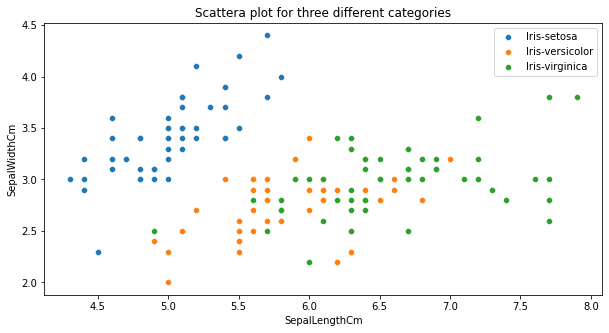

In [8]:
plt.figure(figsize=(10,5))
plt.title('Scattera plot for three different categories')
sns.scatterplot(data = df.head(50),x = 'SepalLengthCm', y = 'SepalWidthCm')
sns.scatterplot(data = df[df.Species=='Iris-versicolor'],x = 'SepalLengthCm', y = 'SepalWidthCm')
sns.scatterplot(data = df.tail(50),x = 'SepalLengthCm', y = 'SepalWidthCm')
plt.legend(labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Splitting Data into train and test data set

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,target,test_size=0.2,random_state=42)

### Hyperparameter Tuning

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
params = {'C':[0.001,0.01,0.1,1],
         'gamma':[0.0001,0.001,0.01,1]}

In [13]:
rc = RandomizedSearchCV(SVC(),param_distributions=params,n_jobs=-1,cv=10)

In [14]:
rc.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1],
                                        'gamma': [0.0001, 0.001, 0.01, 1]})

In [15]:
rc.best_estimator_

SVC(C=1, gamma=1)

### Model Building using Suppport Vector Machine (SVM)

In [16]:
model = SVC(kernel='rbf',C=1,gamma=1)

In [17]:
model.fit(x_train,y_train)
print('train_score : ' + str(model.score(x_train,y_train)))
print('test_score : ' + str(model.score(x_test,y_test)))

train_score : 0.9916666666666667
test_score : 1.0
